In [123]:
import tessreduce as tr
ra = 189.1385817
dec = 11.2316535
tess = tr.tessreduce(tpf='../../../../data/tess/2020fqv.fits')#ra=ra,dec=dec,size=90)#,sector=sector)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import sys
sys.path.append('../tessreduce/')
from catalog_tools import *

In [3]:
table = Get_Catalogue(tess.tpf,Catalog='ps1')

In [4]:
table

,RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,...,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
0,189.218191,10.713819,120851892182547122,436527104,52,0.0413,0.0325,56176.663588,5,30,...,21.2510,0.0329,21.5659,0.2712,115000,NaN,NaN,NaN,NaN,114720
1,189.229529,10.715413,120851892295659055,436281344,52,0.0952,0.0952,55917.757373,4,3,...,21.3561,0.0704,20.6677,0.3268,115000,NaN,NaN,NaN,NaN,114720
2,189.232838,10.717362,120861892329181360,436281344,52,0.1099,0.1099,55698.504340,4,3,...,21.2980,0.1969,NaN,NaN,114992,NaN,NaN,NaN,NaN,114720
3,189.222442,10.725472,120871892225091106,436285440,52,0.1249,0.1249,56022.198646,4,3,...,NaN,NaN,NaN,NaN,114720,NaN,NaN,NaN,NaN,16416
4,189.236512,10.716937,120861892366200789,436363264,52,0.0874,0.0874,56158.758681,4,4,...,NaN,NaN,NaN,NaN,114720,NaN,NaN,NaN,NaN,114720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,189.118948,11.747161,122091891190127105,503635968,60,0.0152,0.0448,55757.110023,5,79,...,13.3750,0.0099,13.4488,0.0046,16892216,13.3915,0.0017,13.4156,0.0016,115000
17435,189.119252,11.747549,122091891192667536,277348352,33,0.0099,0.0099,55697.556285,0,3,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
17436,189.106459,11.755403,122101891063516953,436527104,52,0.0300,0.0242,55913.929792,5,31,...,20.8651,0.0407,20.9445,0.1214,115000,NaN,NaN,NaN,NaN,114720
17437,189.120269,11.740862,122081891202129564,503635968,60,0.0118,0.0126,55729.653125,5,66,...,16.0853,0.0094,16.1506,0.0046,115000,15.7514,0.0060,15.8119,0.0048,115000


In [4]:
ind = (table.imag.values < 19) & (table.imag.values > 14)
tab = table.iloc[ind]

In [5]:
gr = (tab.gmag - tab.rmag).values
ri = (tab.rmag - tab.imag).values

<IPython.core.display.Javascript object>


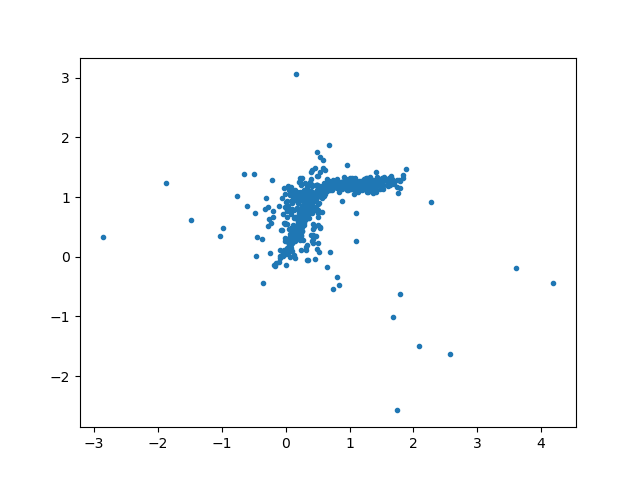

In [6]:
plt.figure()
plt.plot(ri,gr,'.')

<IPython.core.display.Javascript object>


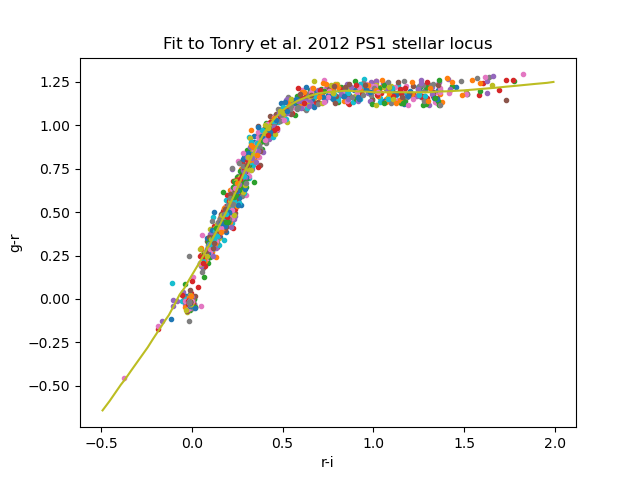

In [7]:
e, dat = tr.Tonry_reduce(tab,plot=True)

In [8]:
e

array([0.018625])

In [9]:
gr = (dat.gmag - dat.rmag).values
ind = (gr < 1) & (dat.imag.values < 17)
d = dat.iloc[ind]

In [10]:
imag = dat.iloc[ind].imag

<IPython.core.display.Javascript object>


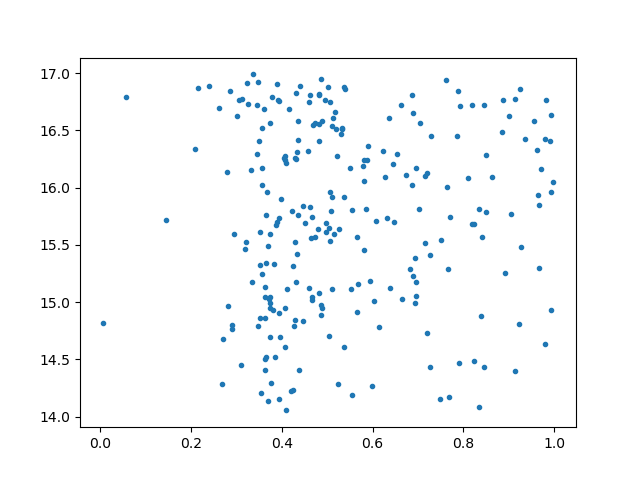

In [11]:
plt.figure()
plt.plot(gr[ind],imag,'.')

In [32]:
d = dat.iloc[ind]
x,y = tess.wcs.all_world2pix(d.RAJ2000.values,d.DEJ2000.values,0)
d['col'] = x
d['row'] = y
pos_ind = (1 < x) & (x < 90-2) & (1 < y) & (y < 90-2)
d = d.iloc[pos_ind]
d = tr.PS1_to_TESS_mag(d)


/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


made reference
made source mask
calculating background
background subtracted
calculating centroids
images shifted


<IPython.core.display.Javascript object>


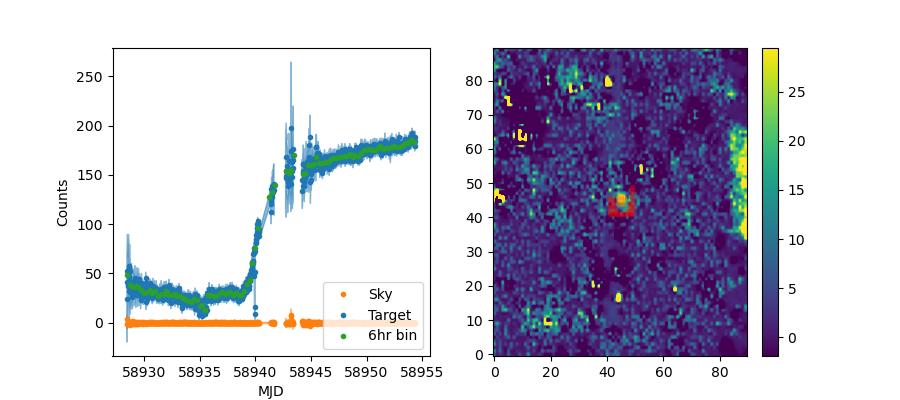

In [124]:
tess.reduce(diff=False)

<IPython.core.display.Javascript object>


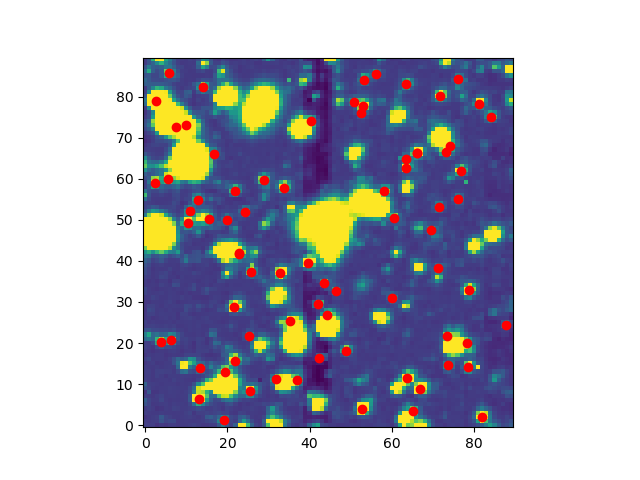

In [31]:
plt.figure()
plt.imshow(tess.ref,origin='lower',vmax=20)
plt.scatter(d.col,d.row,color='r')

/Users/rridden/miniconda3/lib/python3.7/site-packages/tessreduce/catalog_tools.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS1['tmag'] = t


In [96]:
flux = []
eflux = []
for i in range(len(d)):
    mask = np.zeros_like(tess.ref)
    mask[int(d.row.values[i] + .5),int(d.col.values[i] + .5)] = 1
    mask = tr.convolve(mask,np.ones((3,3)))
    flux += [np.nansum(tess.ref*mask)]
    m2 = np.zeros_like(tess.ref)
    m2[int(d.row.values[i] + .5),int(d.col.values[i] + .5)] = 1
    m2 = tr.convolve(m2,np.ones((5,5))) - mask
    eflux += [np.nansum(tess.ref*m2)]
flux = np.array(flux)
eflux = np.array(eflux)
flux[(abs(eflux) > 100)] = np.nan

In [150]:
flux = []
eflux = []
for i in range(len(d)):
    mask = np.zeros_like(tess.ref)
    mask[int(d.row.values[i] + .5),int(d.col.values[i] + .5)] = 1
    mask = tr.convolve(mask,np.ones((3,3)))
    flux += [np.nansum(tess.flux*mask,axis=(1,2))]
    m2 = np.zeros_like(tess.ref)
    m2[int(d.row.values[i] + .5),int(d.col.values[i] + .5)] = 1
    m2 = tr.convolve(m2,np.ones((5,5))) - mask
    eflux += [np.nansum(tess.flux*m2,axis=(1,2))]
flux = np.array(flux)
eflux = np.array(eflux)
flux[(abs(eflux) > 100)] = np.nan

zp = d.tmag.values[:,np.newaxis] + 2.5*np.log10(flux) 
mzp = np.zeros_like(zp[0]) * np.nan
stdzp = np.zeros_like(zp[0]) * np.nan
for i in range(zp.shape[1]):
    thing = tr.calcaverageclass()
    thing.calcaverage_sigmacutloop(zp[np.isfinite(zp[:,i]),i])
    mzp[i] = thing.mean
    stdzp[i] = thing.stdev
if zp_single:
    thing = tr.calcaverageclass()
    thing.calcaverage_sigmacutloop(mzp[np.isfinite(mzp)],noise=stdzp[np.isfinite(mzp)])
    mzp = thing.mean
    stdzp = thing.stdev



NameError: name 'zp_single' is not defined

<IPython.core.display.Javascript object>


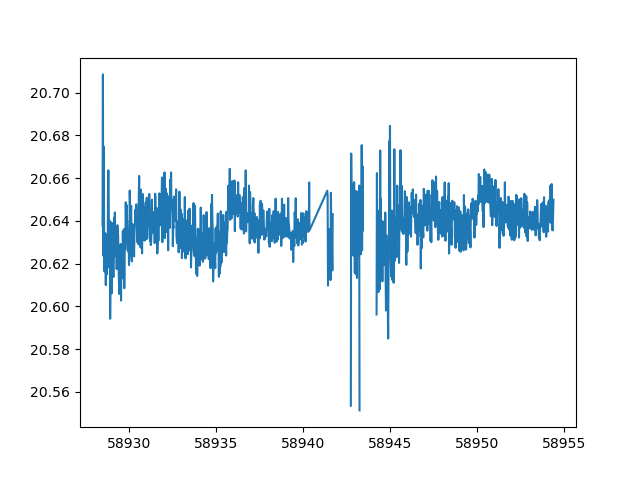

In [144]:
plt.figure()
#plt.fill_between(tess.lc[0],mzp-stdzp,mzp+stdzp,alpha=0.5)
plt.plot(tess.lc[0],mzp)

0

In [147]:
thing.mean

20.639604968886466

In [149]:
thing.stdev

0.012062934057359306

<IPython.core.display.Javascript object>


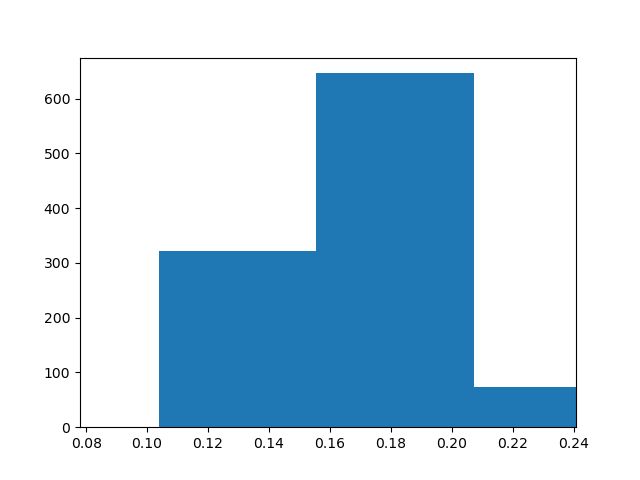

(array([321., 647.,  73.,  42.,  17.,   3.,   2.,   1.,   0.,   1.]),
 array([0.10382116, 0.15549366, 0.20716617, 0.25883868, 0.31051119,
        0.3621837 , 0.41385621, 0.46552871, 0.51720122, 0.56887373,
        0.62054624]),
 <BarContainer object of 10 artists>)

In [145]:
plt.figure()
plt.hist(stdzp)a


In [42]:
np.nanmedian(zp)

20.708350510600532

<IPython.core.display.Javascript object>


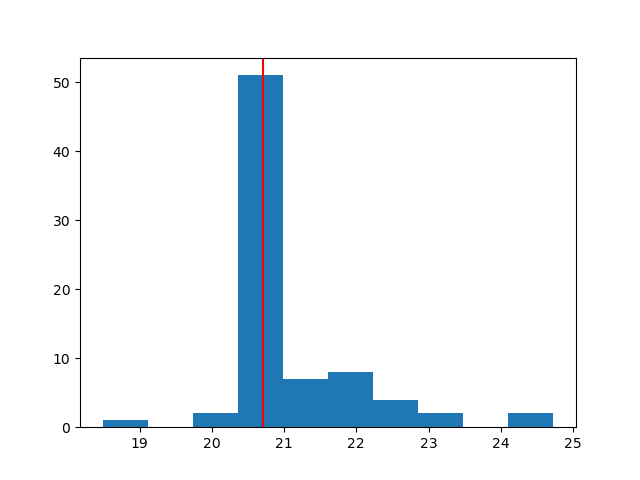

In [41]:
plt.figure()
plt.hist(zp)
plt.axvline(np.nanmedian(zp),color='r')

In [45]:
x,y = tess.wcs.all_world2pix(tab.RAJ2000.values,tab.DEJ2000.values,0)
tab['col'] = x
tab['row'] = y

tab

/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RAJ2000,DEJ2000,objID,f_objID,Qual,e_RAJ2000,e_DEJ2000,_tab1_10,Ns,Nd,...,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,col,row
16,189.164224,10.707631,120841891642789672,436527104,52,0.0047,0.0027,56001.895775,5,62,...,18.6641,0.0110,115000,18.5939,0.0105,18.7336,0.0311,115000,82.008938,-37.516253
23,189.151828,10.720993,120861891519475712,503635968,60,0.0048,0.0037,55930.710995,5,73,...,15.0986,0.0028,115000,15.0096,0.0053,15.0937,0.0122,115000,79.153557,-36.155232
83,189.114201,10.725415,120871891143081059,310452224,37,0.0159,0.0159,56819.365833,0,4,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,72.762999,-37.851630
84,189.118311,10.722323,120861891183567300,402731008,48,0.0153,0.0153,55251.598576,1,3,...,NaN,NaN,16416,NaN,NaN,NaN,NaN,16416,73.625311,-38.087210
94,189.118760,10.734529,120881891188282196,302067712,36,0.0278,0.0278,55945.664664,0,3,...,15.1502,0.0067,16777496,NaN,NaN,NaN,NaN,0,72.929566,-36.089883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,188.856797,11.677627,122011888567753641,503635968,60,0.0022,0.0022,56085.313148,5,72,...,17.2067,0.0087,115000,17.0766,0.0076,17.1565,0.0171,115000,-28.888889,99.312279
17393,188.926576,11.692831,122031889265541872,503635968,60,0.0033,0.0038,56027.603866,5,77,...,17.0969,0.0096,115000,16.9332,0.0065,17.0388,0.0194,115000,-18.543728,106.209572
17429,189.163599,11.742284,122091891636091243,503635968,60,0.0071,0.0050,55930.113056,5,84,...,16.7212,0.0058,115000,16.5617,0.0058,16.6287,0.0078,115000,16.717271,129.301511
17435,189.119252,11.747549,122091891192667536,277348352,33,0.0099,0.0099,55697.556285,0,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,9.207404,127.320618


In [55]:
d2 = deepcopy(d)
for i in range(len(d)):
    x = d.col.values[i]
    y = d.row.values[i]
    
    dist = np.sqrt((tab.col.values-x)**2 + (tab.row.values-y)**2)
    
    ind = dist < 1.5
    close = tab.iloc[ind]
    
    d2['gmag'].iloc[i] = -2.5*np.log10(np.nansum(tr.mag2flux(close.gmag.values))) + 25
    d2['rmag'].iloc[i] = -2.5*np.log10(np.nansum(tr.mag2flux(close.rmag.values))) + 25
    d2['imag'].iloc[i] = -2.5*np.log10(np.nansum(tr.mag2flux(close.imag.values))) + 25
    d2['zmag'].iloc[i] = -2.5*np.log10(np.nansum(tr.mag2flux(close.zmag.values))) + 25
    d2['ymag'].iloc[i] = -2.5*np.log10(np.nansum(tr.mag2flux(close.ymag.values))) + 25

/Users/rridden/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [57]:
d2 = tr.PS1_to_TESS_mag(d2)

In [60]:
d2.tmag.values - d.tmag.values

array([-1.34664821e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.31343422e-01,  0.00000000e+00,  0.00000000e+00, -8.12333184e-02,
        0.00000000e+00, -5.23462693e-02,  0.00000000e+00, -2.88089981e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.74360842e-01, -1.14857559e-01,  0.00000000e+00,
        0.00000000e+00, -7.87843423e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.58787507e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.32385074e-02, -3.55271368e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.56134460e-02,  0.00000000e+00,
       -4.13750778e-01, -1.24779381e+00,  0.00000000e+00, -8.35929796e-02,
        0.00000000e+00, -2.22183459e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.61067799e-01,  0.00000000e+00,
       -4.86746181e-02, -

In [82]:
zp = d2.tmag.values + 2.5*np.log10(flux) 

In [83]:
zp

array([20.56377532,         nan, 20.5667491 , 20.51637923, 20.62702771,
       20.59102803,         nan, 20.48664227, 20.08453326,         nan,
               nan, 20.49816253, 20.87663377, 20.43863516, 20.85874101,
       20.61222405, 20.52175394, 20.43051057,         nan, 20.53485814,
       18.48758058,         nan,         nan, 20.1475986 ,         nan,
       20.53094255, 20.58288754,         nan, 20.82272816, 20.71299409,
       20.47279235, 20.55692066, 20.58682664, 20.37726328, 20.57812315,
       20.72887871,         nan, 20.52533041, 20.62388767, 20.534082  ,
               nan,         nan, 20.58486429, 20.52331032, 20.65880315,
       20.51955202, 20.53087279, 20.72186534,         nan, 20.50202506,
       20.62886147,         nan,         nan,         nan,         nan,
       20.50899007,         nan,         nan, 20.56615384, 20.61689854,
       20.54779042,         nan,         nan, 19.86836454, 19.86836454,
               nan, 20.61765832, 20.61267254, 20.7415779 ,      

In [84]:
np.nanmedian(zp)

20.564964583641178

In [88]:
thing = tr.calcaverageclass()
thing.calcaverage_sigmacutloop(zp[np.isfinite(zp)])

0

In [89]:
thing.mean

20.59166811138503

In [109]:
mask = tr.sigma_mask(zp,3)

In [110]:
thing.mean_err

0.015551429595707877

<IPython.core.display.Javascript object>


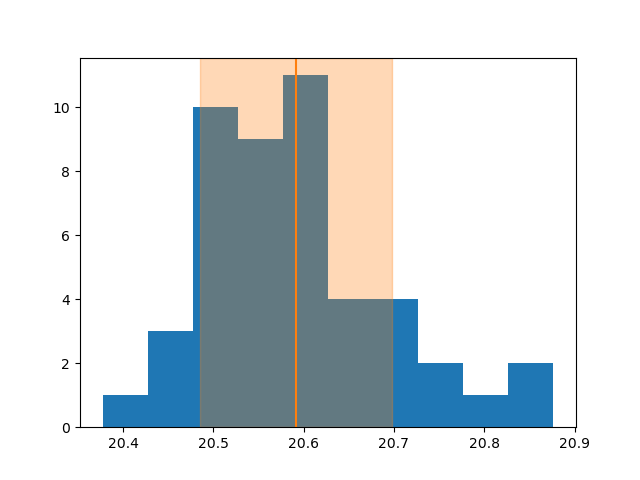

In [116]:
plt.figure()

plt.hist(zp[mask],bins=10)
plt.axvline(thing.mean,color='C1')
plt.axvspan(thing.mean-thing.stdev,thing.mean+thing.stdev,alpha=0.3,color='C1')

<IPython.core.display.Javascript object>


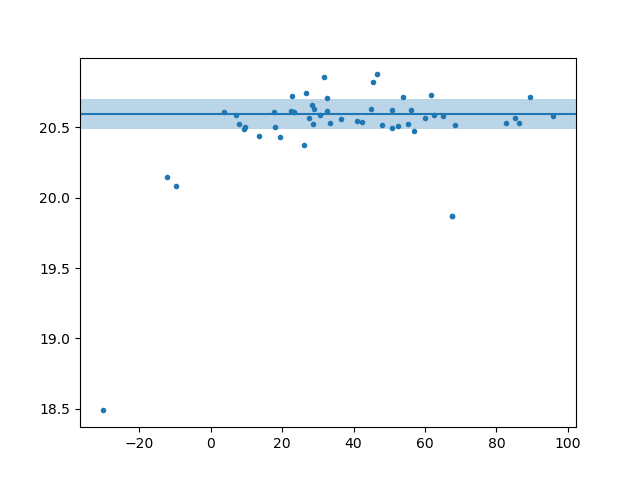

In [112]:
plt.figure()
plt.plot(eflux,zp,'.')
plt.axhspan(thing.mean-thing.stdev,thing.mean+thing.stdev,alpha=0.3)
plt.axhline(thing.mean)

In [113]:
thing.stdev

0.10661522985062766

In [119]:
test = tess.tpf.flux.value - tess.bkg

<IPython.core.display.Javascript object>


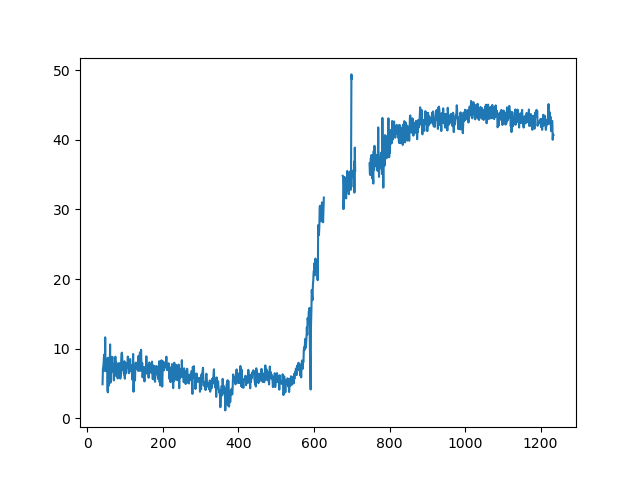

In [121]:
plt.figure()
plt.plot(tess.flux[:,45,45])

<IPython.core.display.Javascript object>


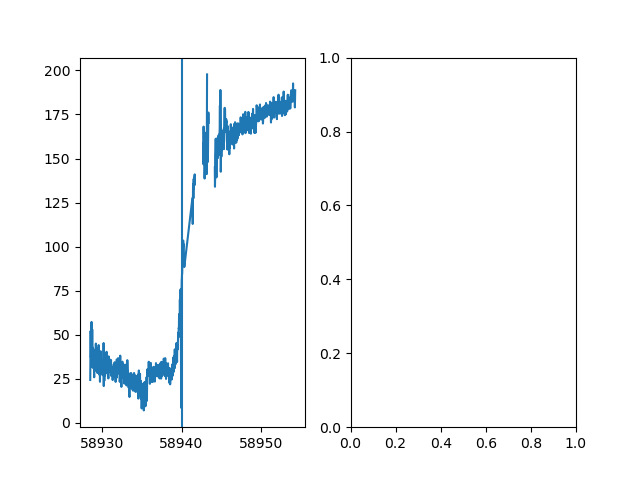

<AxesSubplot:>

In [151]:
plt.figure()
plt.subplot(121)
plt.plot(tess.lc[0],tess.lc[1])
plt.subplot(122)

In [152]:
plt.subplot(121)
plt.axvline(58940)

/Users/rridden/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.
